In [10]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import opendatasets as od

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [12]:
!pip install opendatasets


Defaulting to user installation because normal site-packages is not writeable


In [13]:
dataset = 'https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download '

In [14]:
od.download(dataset)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  kartikeybisht11


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


100%|██████████| 6.18k/6.18k [00:00<00:00, 2.11MB/s]

In [26]:
heart_df = pd.read_csv('heart-disease-dataset/heart.csv')


In [27]:
print(heart_df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [29]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [30]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


***#Feature Selection***

***# HEAT MAP***

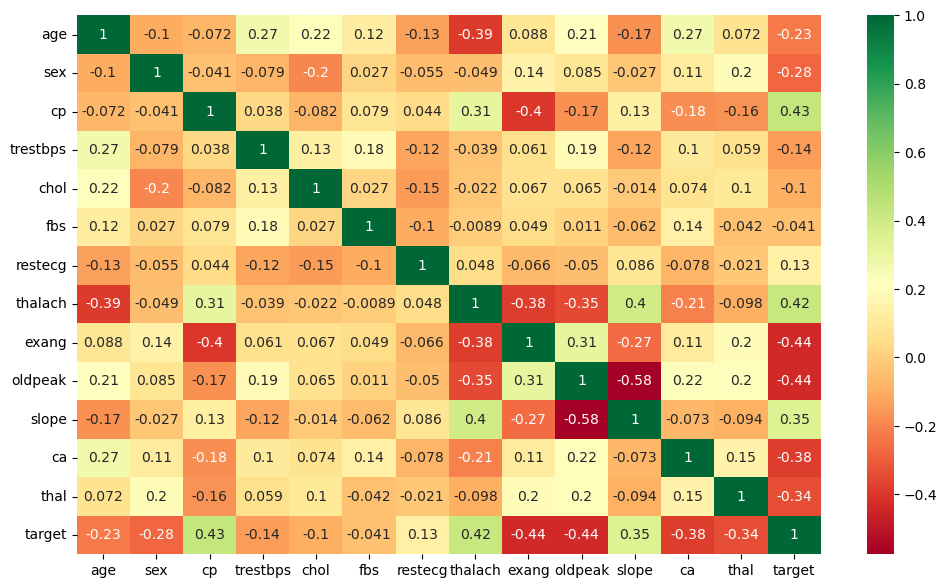

In [39]:
import seaborn as sns
corrmat = heart_df.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(12,7))
g=sns.heatmap(heart_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

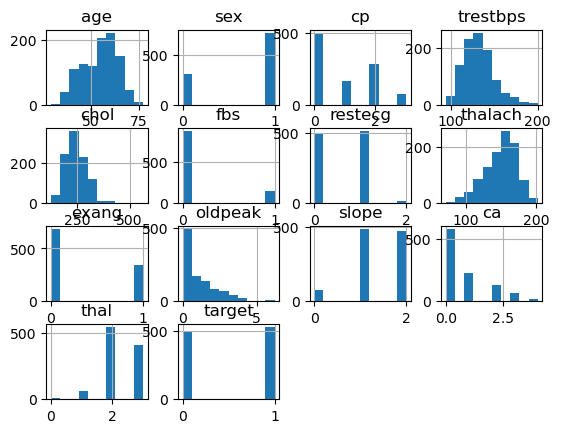

In [37]:
heart_df.hist()

<Axes: xlabel='target', ylabel='count'>

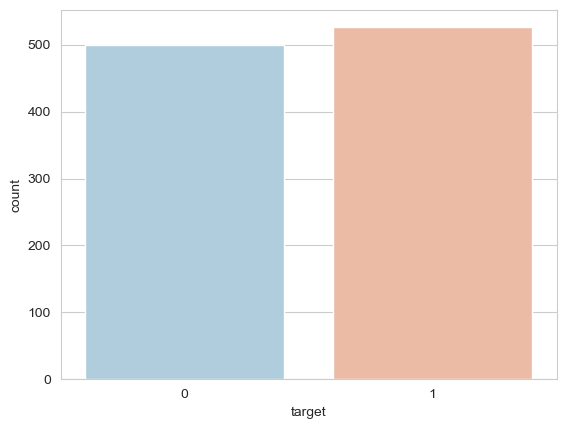

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=heart_df,palette='RdBu_r')

***# BOX PLOT IMPLEMENTATION***

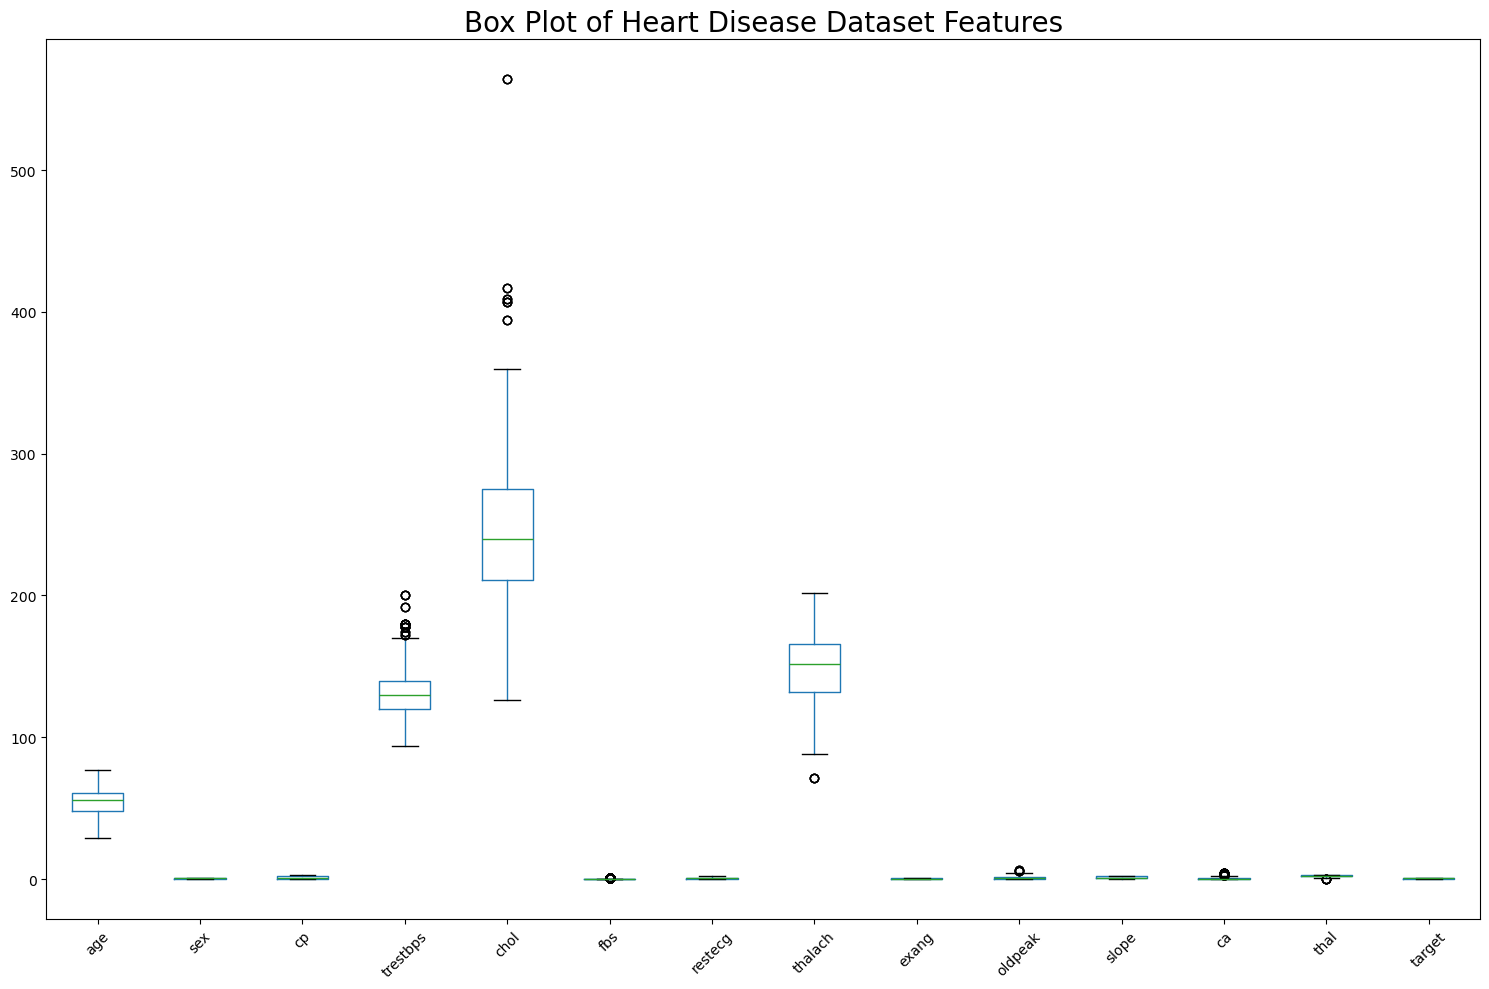

In [51]:
import matplotlib.pyplot as plt
import pandas as pd


heart_df = pd.read_csv('heart-disease-dataset/heart.csv')


plt.figure(figsize=(15,10)) 
heart_df.boxplot(grid=False)  


plt.title('Box Plot of Heart Disease Dataset Features', fontsize=20)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  


In [54]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


heart_df = pd.read_csv('heart-disease-dataset/heart.csv')  

categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'slope', 'ca', 'thal', 'target']
dataset = pd.get_dummies(heart_df, columns=categorical_columns)

standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
columns_present = [col for col in columns_to_scale if col in dataset.columns]
dataset[columns_present] = standardScaler.fit_transform(dataset[columns_present])

X = dataset.drop(columns=['target_0', 'target_1'], errors='ignore')
y = dataset['target_1'] if 'target_1' in dataset.columns else dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (820, 29)
X_test shape: (205, 29)
y_train shape: (820,)
y_test shape: (205,)


In [59]:
dataset.head()

,age,trestbps,chol,thalach,exang,oldpeak,sex_0,sex_1,cp_0,cp_1,...,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target_0,target_1
0,-0.268437,-0.377636,-0.659332,0.821321,0,-0.060888,False,True,True,False,...,False,True,False,False,False,False,False,True,True,False
1,-0.158157,0.479107,-0.833861,0.255968,1,1.727137,False,True,True,False,...,False,False,False,False,False,False,False,True,True,False
2,1.716595,0.764688,-1.396233,-1.048692,1,1.301417,False,True,True,False,...,False,False,False,False,False,False,False,True,True,False
3,0.724079,0.936037,-0.833861,0.516900,0,-0.912329,False,True,True,False,...,True,False,False,False,False,False,False,True,True,False
4,0.834359,0.364875,0.930822,-1.874977,0,0.705408,True,False,True,False,...,False,False,True,False,False,False,True,False,True,False


***# K NEIGHBORS CLASSIFICATON***

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores =[]
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier, X, y, cv=10)
    knn_scores.append(score.mean())

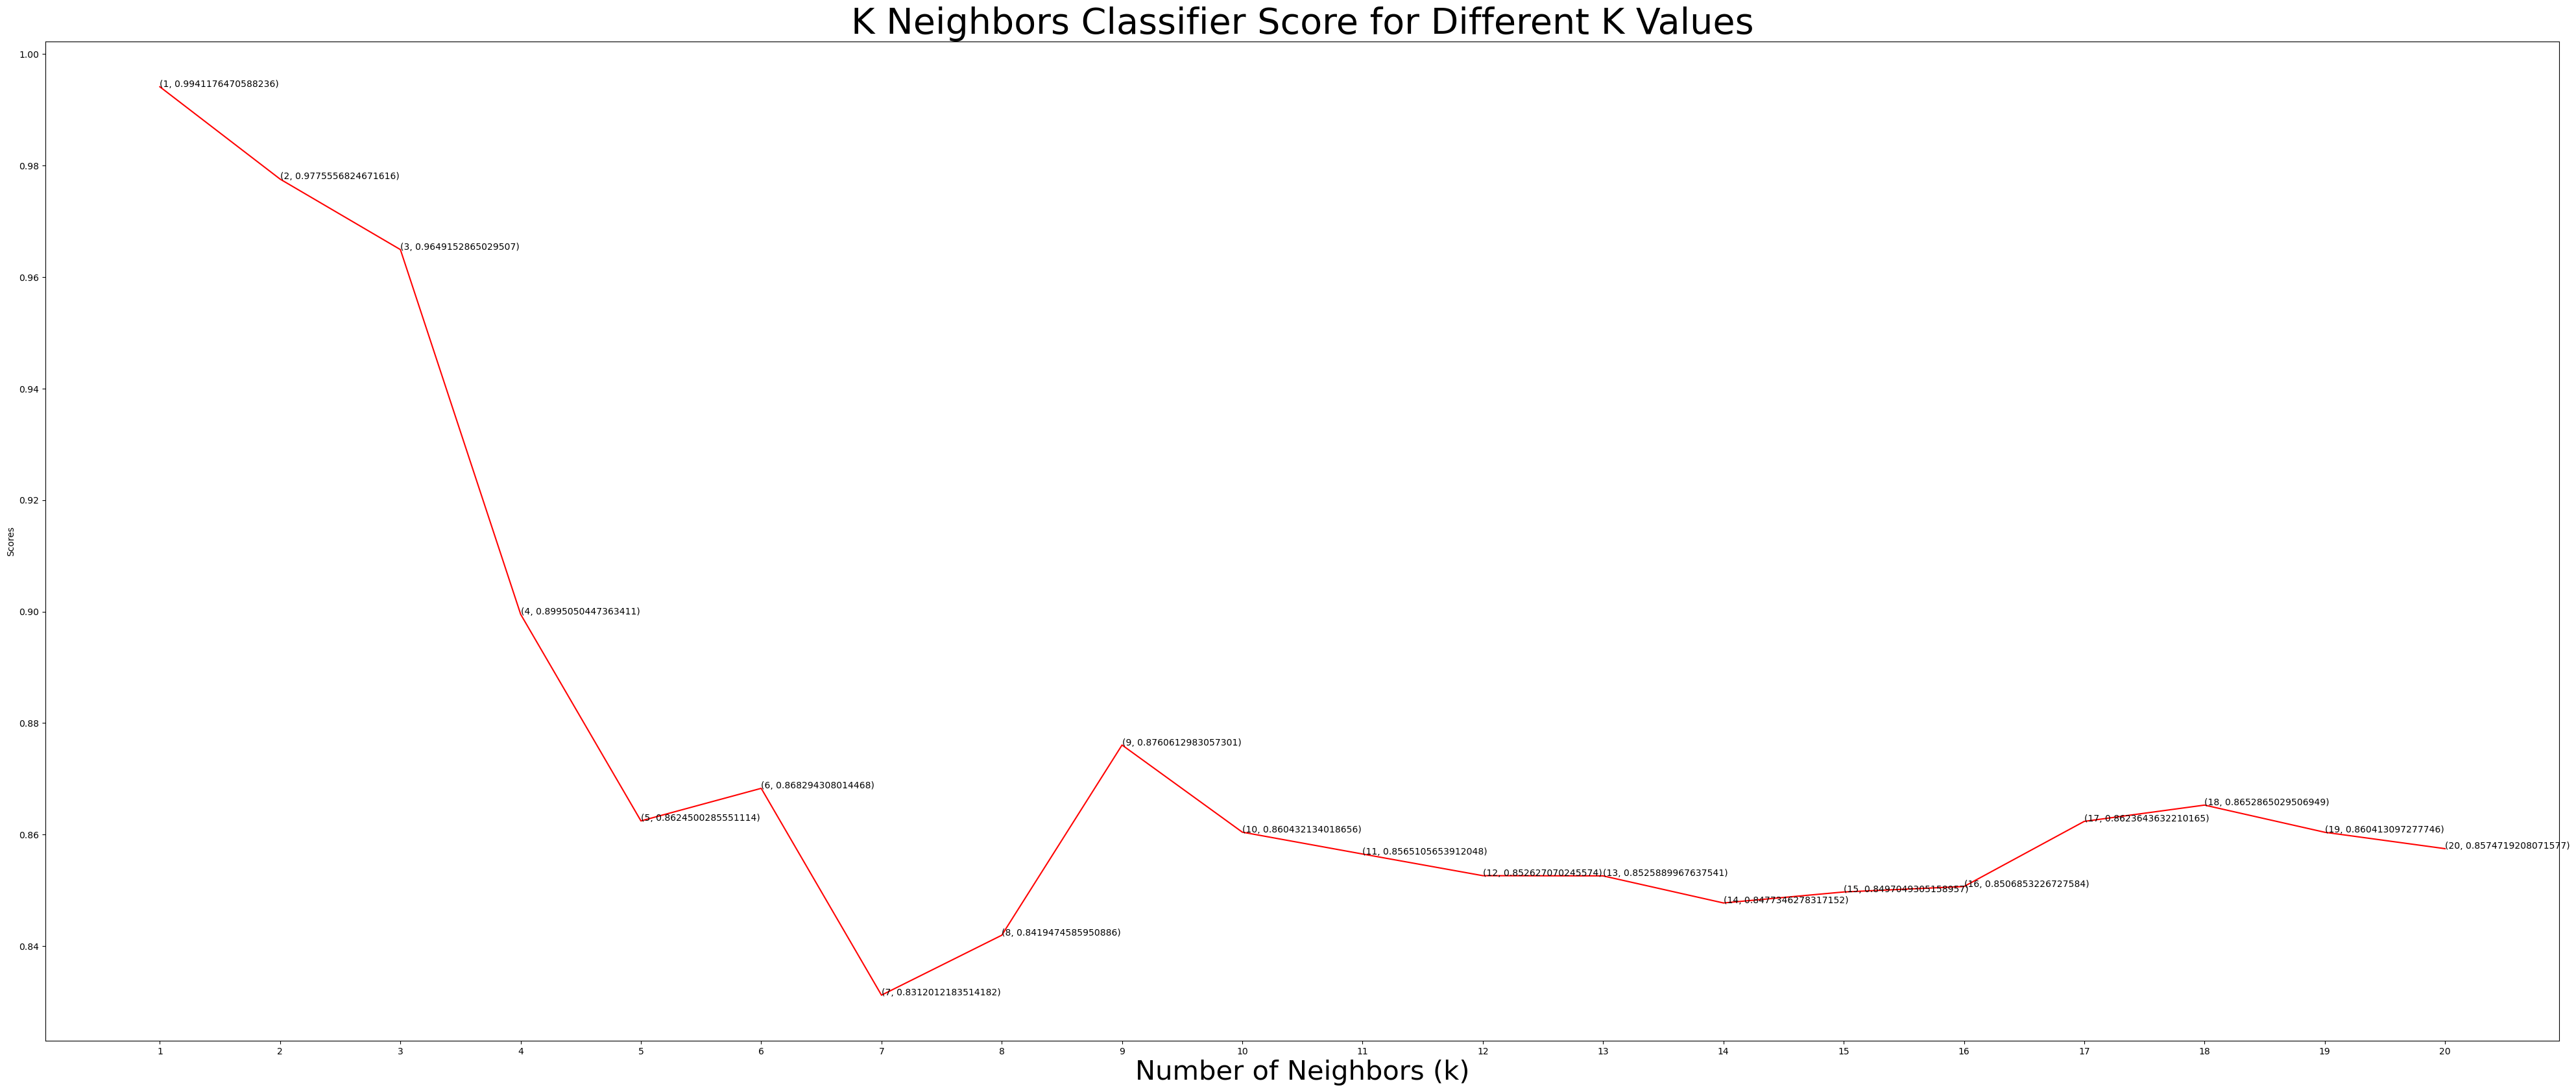

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 20))
plt.plot([k for k in range(1, 21)], knn_scores, color='red')
for i in range(1, 21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (k)',fontsize=30)
plt.ylabel('Scores')
plt.title('K Neighbors Classifier Score for Different K Values', fontsize=40)
plt.show()


***#Random Forest Classifier***

In [108]:
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display, Markdown

In [85]:
randomforest_classifier=RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,X,y,cv=10)


****************************************
Mean cross-validation score: 0.86
****************************************



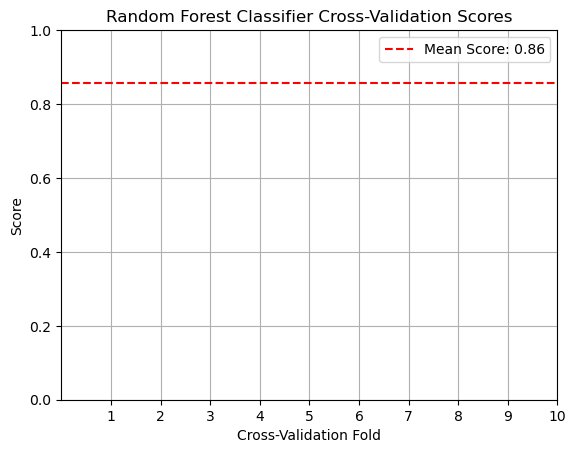

In [113]:
mean_score = score.mean()
print("\n" + "*" * 40)
print(f"Mean cross-validation score: {mean_score:.2f}")
print("*" * 40 + "\n")
plt.axhline(mean_score, color='r', linestyle='--', label=f'Mean Score: {mean_score:.2f}')
plt.title('Random Forest Classifier Cross-Validation Scores')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('Score')
plt.xticks(range(1, 11))  
plt.ylim(0, 1)  
plt.legend()
plt.grid()
plt.show()

***#LOGISTIC REGRESSION IMPLEMENTATION***

In [117]:
from sklearn.linear_model import LogisticRegression
logistic_regression_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_scores = cross_val_score(logistic_regression_classifier, X, y, cv=10)


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_mean_score = logistic_scores.mean()
print("\n" + "*" * 40)
print(f"Logistic Regression Mean cross-validation score: {logistic_mean_score:.2f}")
print("*" * 40 + "\n")



****************************************
Logistic Regression Mean cross-validation score: 0.86
****************************************



In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



In [140]:
logistic_regression_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_scores = cross_val_score(logistic_regression_classifier, X, y, cv=10)


In [141]:
logistic_mean_score = logistic_scores.mean()
print("\n" + "*" * 40)
print(f"Logistic Regression Mean cross-validation score: {logistic_mean_score:.2f}")
print("*" * 40 + "\n")


****************************************
Logistic Regression Mean cross-validation score: 0.86
****************************************



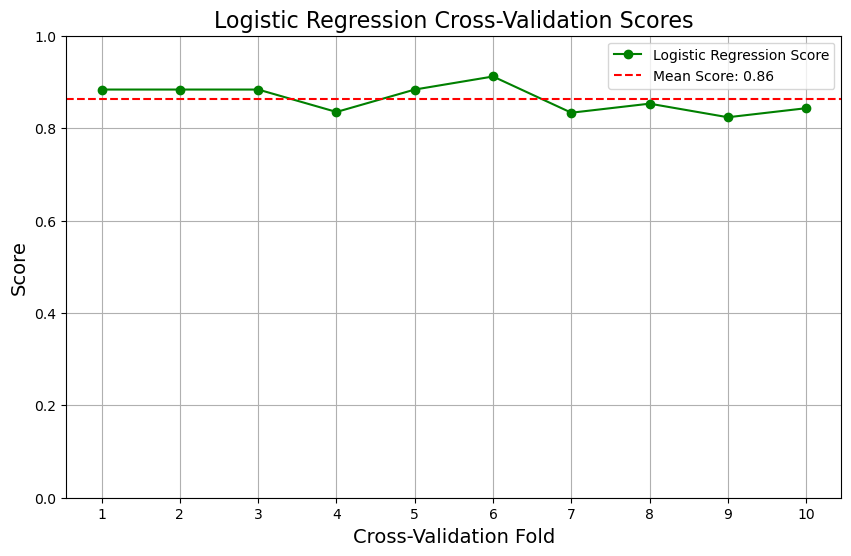

In [143]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), logistic_scores, marker='o', linestyle='-', color='g', label='Logistic Regression Score')
plt.axhline(logistic_mean_score, color='r', linestyle='--', label=f'Mean Score: {logistic_mean_score:.2f}')
plt.title('Logistic Regression Cross-Validation Scores', fontsize=16)
plt.xlabel('Cross-Validation Fold', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(range(1, 11))
plt.ylim(0, 1)
plt.legend()
plt.grid()

plt.show()

***# DECISION TREE***

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [14]:
heart_df = pd.read_csv('heart-disease-dataset/heart.csv')
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'slope', 'ca', 'thal']
dataset = pd.get_dummies(heart_df, columns=categorical_columns)


In [15]:
X = dataset.drop(columns=['target'])
y = dataset['target']

In [16]:
decision_tree_classifier = DecisionTreeClassifier()
score = cross_val_score(decision_tree_classifier, X, y, cv=10)


In [17]:
print("Mean cross-validation score for Decision Tree:", score.mean())

Mean cross-validation score for Decision Tree: 0.9970588235294118


***# IMPLEMENTING PIE CHART***

In [22]:
import matplotlib.pyplot as plt

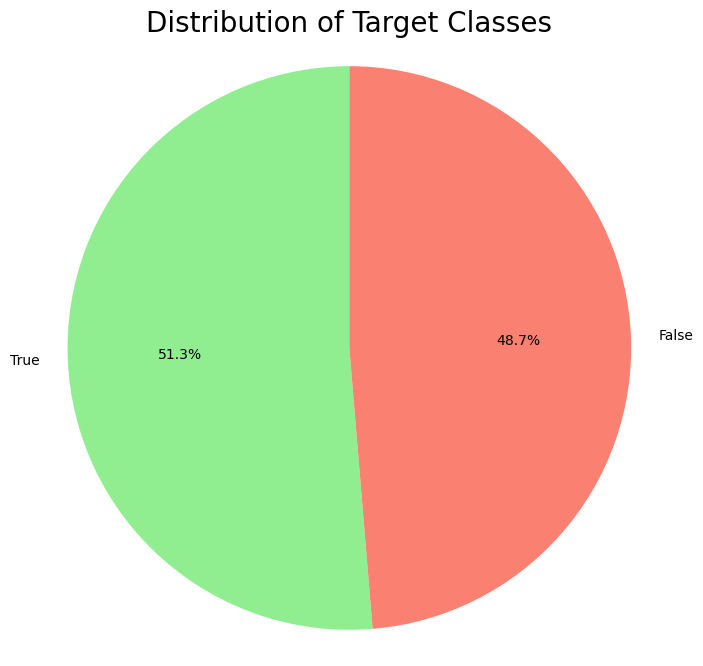

X_train shape: (820, 29)
X_test shape: (205, 29)
y_train shape: (820,)
y_test shape: (205,)


In [102]:
target_counts = y.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title('Distribution of Target Classes',fontsize=20)
plt.axis('equal') 
plt.show()
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

***Where blue represents  "No Heart Disease" (often represented as 0).***
***And red represents "Heart Disease" (often represented as 1).***

***#LINEAR REGRESSION***

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
heart_df = pd.read_csv('heart-disease-dataset/heart.csv')
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'slope', 'ca', 'thal']
dataset = pd.get_dummies(heart_df, columns=categorical_columns)


In [35]:
X = dataset.drop(columns=['target'])
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
y_pred = linear_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [38]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.1315269053318249
R^2 Score: 0.47387985945460287


***#SCATTER PLOT***

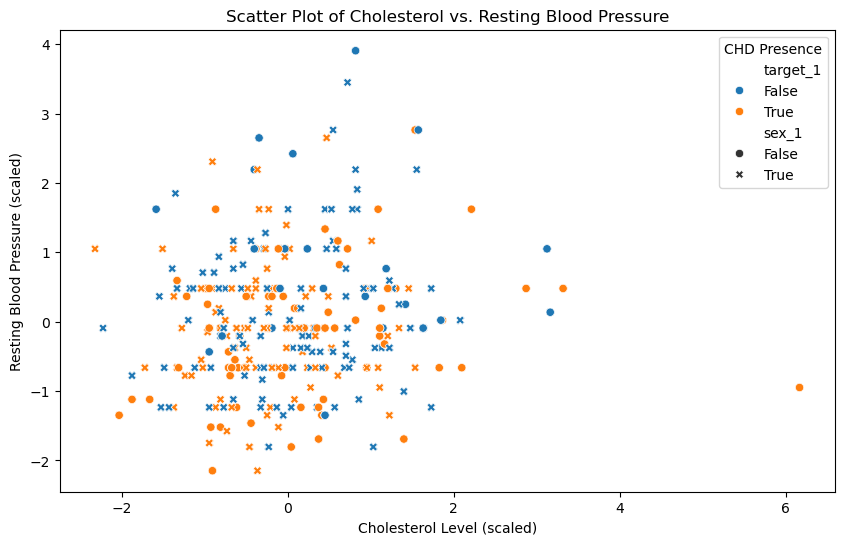

In [62]:
plt.figure(figsize=(10, 6))

if 'sex_1' in dataset.columns:
    sns.scatterplot(data=dataset, x='chol', y='trestbps', hue='target_1' if 'target_1' in dataset.columns else 'target', style='sex_1')
else:
    sns.scatterplot(data=dataset, x='chol', y='trestbps', hue='target_1' if 'target_1' in dataset.columns else 'target')

plt.title('Scatter Plot of Cholesterol vs. Resting Blood Pressure')
plt.xlabel('Cholesterol Level (scaled)')
plt.ylabel('Resting Blood Pressure (scaled)')
plt.legend(title='CHD Presence')

plt.show()


***#BOX PLOT***

Text(0, 0.5, 'Resting Blood Pressure (scaled)')

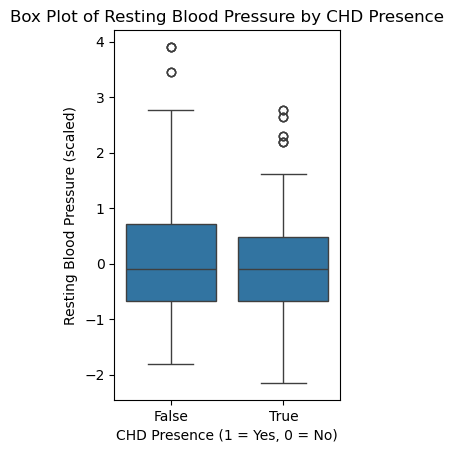

In [61]:
plt.subplot(1, 2, 2) 
sns.boxplot(x='target_1' if 'target_1' in dataset.columns else 'target', y='trestbps', data=dataset)
plt.title('Box Plot of Resting Blood Pressure by CHD Presence')
plt.xlabel('CHD Presence (1 = Yes, 0 = No)')
plt.ylabel('Resting Blood Pressure (scaled)')